In [95]:
from zipfile import ZipFile
import random
import numpy as np
import sklearn as sk
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt

In [69]:
with ZipFile('archive.zip', 'r') as zObject:
    zObject.extractall(path="dataset")

df = pd.read_csv("dataset/london_weather.csv")

In [70]:
df.head(5)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [137]:
df['global_radiation'] = df['global_radiation'].fillna(df['global_radiation'].median())
target_df = df["global_radiation"]

In [138]:
target_df

0        52.0
1        27.0
2        13.0
3        13.0
4        29.0
         ... 
15336    32.0
15337    38.0
15338    21.0
15339    22.0
15340    34.0
Name: global_radiation, Length: 15341, dtype: float64

In [150]:
daily_temp = pd.Series(list(map(np.log, list(target_df))), index=pd.date_range(start='1/1/1979', periods=len(target_df), freq='d'))

In [151]:
daily_temp

1979-01-01    3.951244
1979-01-02    3.295837
1979-01-03    2.564949
1979-01-04    2.564949
1979-01-05    3.367296
                ...   
2020-12-27    3.465736
2020-12-28    3.637586
2020-12-29    3.044522
2020-12-30    3.091042
2020-12-31    3.526361
Freq: D, Length: 15341, dtype: float64

In [152]:
15341 * 0.7

10738.699999999999

In [153]:
train = daily_temp[:10738]
test = daily_temp[10738:]

In [154]:
fitted_model = sm.tsa.holtwinters.ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=365).fit()

In [155]:
predictions = fitted_model.forecast(len(test))

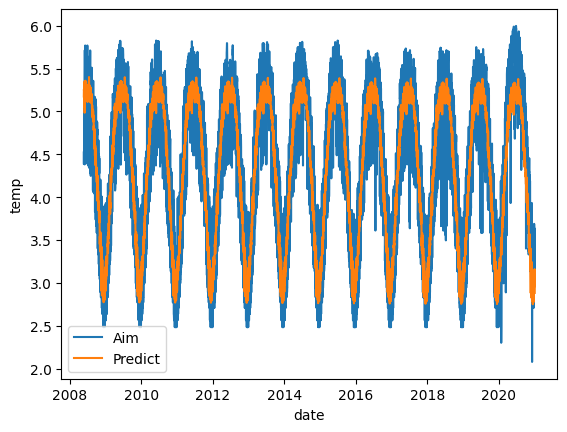

In [156]:
x1, y1 = predictions.index.values, predictions.values
x2, y2 = test.index.values, test.values
x3, y3 = train.index.values, train.values

# plt.plot(x3, y3, label = "Train")
plt.plot(x2, y2, label = "Aim")
plt.plot(x1, y1, label = "Predict")

plt.xlabel('date')
plt.ylabel('temp')

plt.legend()
plt.show()

In [157]:
errors = predictions - test

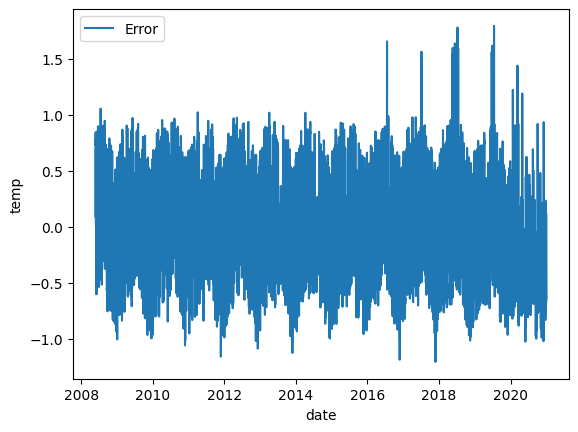

In [158]:
x, y = errors.index.values, errors.values

plt.plot(x, y, label = "Error")

plt.xlabel('date')
plt.ylabel('temp')

plt.legend()
plt.show()

In [159]:
sk.metrics.mean_squared_error(test, predictions)

0.24446390395692547

In [160]:
sk.metrics.r2_score(test, predictions)

0.7166773769626913